<a href="https://colab.research.google.com/github/Anon11223/Keras/blob/master/Credit_card_fraud_Anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ashniz","key":"5f8906364da148edbb3b2a70aa8fbe3d"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          14240  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          10204  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           2517  
lava18/google-play-store-apps                                Google Play Store Apps                                2MB  2019-02-03 13:55:47          40943  
bigquery/crypto-ethereum-classic                          

In [0]:
!kaggle datasets download mlg-ulb/creditcardfraud

 92% 61.0M/66.0M [00:00<00:00, 58.9MB/s]
100% 66.0M/66.0M [00:00<00:00, 79.8MB/s]


In [0]:
!ls -lart /content
!unzip creditcardfraud.zip

total 67556
drwxr-xr-x 1 root root     4096 Feb 26 17:33 .config
drwxr-xr-x 1 root root     4096 Feb 26 17:33 sample_data
drwxr-xr-x 1 root root     4096 Mar 10 18:10 ..
-rw-r--r-- 1 root root       62 Mar 10 18:14 kaggle.json
drwxr-xr-x 1 root root     4096 Mar 10 18:29 .
-rw-r--r-- 1 root root 69155632 Mar 10 18:29 creditcardfraud.zip
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [0]:
!ls -lart /content

total 214852
-rw-r--r-- 1 root root 150828752 Mar 23  2018 creditcard.csv
drwxr-xr-x 1 root root      4096 Feb 26 17:33 .config
drwxr-xr-x 1 root root      4096 Feb 26 17:33 sample_data
drwxr-xr-x 1 root root      4096 Mar 10 18:10 ..
-rw-r--r-- 1 root root        62 Mar 10 18:14 kaggle.json
-rw-r--r-- 1 root root  69155632 Mar 10 18:29 creditcardfraud.zip
drwxr-xr-x 1 root root      4096 Mar 10 18:31 .


In [0]:
#

# Import libraries


In [0]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tfthe 
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

Using TensorFlow backend.


In [0]:
#Load the credit card data

In [0]:
df = pd.read_csv("creditcard.csv")


In [0]:
#What is the shape of the file
df.shape

(284807, 31)

In [0]:
#Check if any values are null

In [0]:
df.isnull().values.any()

False

In [0]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [0]:
count_classes = pd.value_counts(df['Class'],sort=True)

NameError: ignored

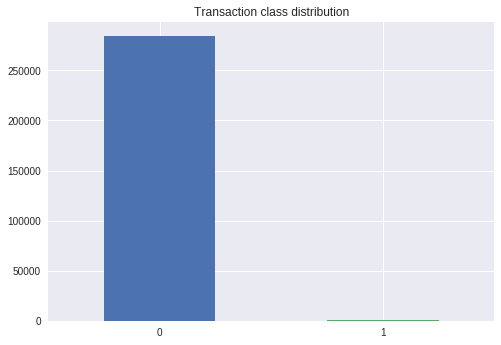

In [0]:
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [0]:
pd.value_counts(df['Class'])

0    284315
1       492
Name: Class, dtype: int64

In [0]:
#Prepare the data
#Load skikit
from sklearn.preprocessing import StandardScaler


In [0]:
data = df.drop(['Time'], axis=1)


In [0]:
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [0]:
#Std scalar removes the mean
#scales the values to unit variance ??? between -1 and 1d
StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

array([[ 0.24496426],
       [-0.34247454],
       [ 1.16068593],
       ...,
       [-0.0818393 ],
       [-0.31324853],
       [ 0.51435531]])

In [0]:
data['Amount']= StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [0]:
pd.value_counts(data['Class'])

0    284315
1       492
Name: Class, dtype: int64

In [0]:
!ls -lart /content/

total 214852
-rw-r--r-- 1 root root 150828752 Mar 23  2018 creditcard.csv
drwxr-xr-x 1 root root      4096 Feb 26 17:33 .config
drwxr-xr-x 1 root root      4096 Feb 26 17:33 sample_data
drwxr-xr-x 1 root root      4096 Mar 10 18:10 ..
-rw-r--r-- 1 root root        62 Mar 10 18:14 kaggle.json
-rw-r--r-- 1 root root  69155632 Mar 10 18:29 creditcardfraud.zip
drwxr-xr-x 1 root root      4096 Mar 10 18:31 .


In [0]:
#80% Training data,20% Test data
X_train,X_test = train_test_split(data,test_size=0.2,random_state=42)

In [0]:
X_train.shape

(227845, 30)

In [0]:
X_test.shape

(56962, 30)

In [0]:
pd.value_counts(X_train['Class'])

0    227451
1       394
Name: Class, dtype: int64

In [0]:
#Remove or drop all fraud transaction in train == 1
X_train = X_train[X_train.Class == 0]

In [0]:
pd.value_counts(X_train['Class'])

0    227451
Name: Class, dtype: int64

In [0]:
X_train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.313289,0
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.169717,0
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.305292,0
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.116306,0
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.250239,0


In [0]:
X_train = X_train.drop(['Class'],axis=1)

In [0]:
X_train.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.313289
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.169717
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.305292
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.116306
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.250239


In [0]:
X_train.shape

(227451, 29)

In [0]:
y_test = X_test['Class']

In [0]:
X_test = X_test.drop(['Class'],axis=1)

In [0]:
X_train.values

array([[ 1.95504092e+00, -3.80782711e-01, -3.15012853e-01, ...,
         4.51682478e-02, -4.71447917e-02, -3.13288512e-01],
       [-4.00975239e-01, -6.26942769e-01,  1.55533881e+00, ...,
        -3.70468822e-01, -1.44791686e-01, -1.69717237e-01],
       [ 7.25090164e-02,  8.20565650e-01, -5.61350916e-01, ...,
         2.06394866e-01,  7.02877702e-02, -3.05292340e-01],
       ...,
       [-1.46608925e-01,  9.92946123e-01,  1.52459137e+00, ...,
        -1.21139194e-01, -1.96195328e-01, -3.37476933e-01],
       [-2.94863809e+00,  2.35484929e+00, -2.52120111e+00, ...,
         4.96912107e-01,  3.35821632e-01, -3.49231307e-01],
       [ 1.23317435e+00, -7.84850501e-01,  3.86783869e-01, ...,
         1.21657270e-03,  3.85878912e-02,  9.85543469e-02]])

In [0]:
X_train = X_train.values

In [0]:
X_test = X_test.values

In [0]:
X_train.shape

(227451, 29)

In [0]:
#Build Autoencoder using 4 fully connected layers with 14, 7, 7 and 29 neurons 
input_layer = Input(shape=(29,))
encoder = Dense(14,activation='tanh',activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(7,activation='relu')(encoder)

decoder = Dense(7,activation='tanh')(encoder)
decoder = Dense(29,activation='relu')(decoder)

autoencoder = Model(inputs=input_layer,outputs=decoder)


In [0]:
#Train for 100 epoch; Batch zie = 32
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",verbose=0,save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',histogram_freq=0,write_graph=True,write_images=True)
#history = autoencoder.fit(x=X_train, y=X_train, batch_size=32, epochs=100, verbose=1, callbacks=[checkpointer,tensorboard], validation_data=(X_train,X_test), shuffle=True).history
history = autoencoder.fit(X_train, X_train,
                    epochs=100,
                    batch_size=32,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Instructions for updating:
Use tf.cast instead.
Train on 227451 samples, validate on 56962 samples
Epoch 1/100
227451/227451 [==============================] - 10s 45us/step - loss: 0.8312 - acc: 0.5377 - val_loss: 0.8135 - val_acc: 0.5735
Epoch 2/100
227451/227451 [==============================] - 10s 43us/step - loss: 0.7706 - acc: 0.5787 - val_loss: 0.7937 - val_acc: 0.5812
Epoch 3/100
227451/227451 [==============================] - 10s 43us/step - loss: 0.7592 - acc: 0.5938 - val_loss: 0.7874 - val_acc: 0.5997
Epoch 4/100
227451/227451 [==============================] - 10s 43us/step - loss: 0.7541 - acc: 0.6036 - val_loss: 0.7839 - val_acc: 0.6026
Epoch 5/100
227451/227451 [==============================] - 10s 43us/step - loss: 0.7507 - acc: 0.6068 - val_loss: 0.7836 - val_acc: 0.6049
Epoch 6/100
227451/227451 [==============================] - 10s 43us/step - loss: 0.7485 - acc: 0.6113 - val_loss: 0.7779 - val_acc: 0.6168
Epoch 7/100
227451/227451 [============================

In [0]:
autoencoder = load_model('model.h5')

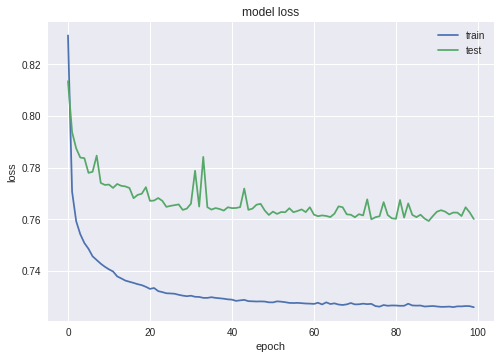

In [0]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [0]:
predictions  = autoencoder.predict(X_test)

In [0]:
predictions.shape

(56962, 29)

In [0]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

In [0]:
mse

array([81.17927239,  0.79774921,  0.26860064, ...,  0.45111158,
        0.11799729,  1.66496737])

In [0]:
error_df = pd.DataFrame({'recon_error': mse,'true_class': y_test})

In [0]:
error_df.describe()

,recon_error,true_class
count,56962.000000,56962.000000
mean,0.751097,0.001720
std,3.398436,0.041443
min,0.032737,0.000000
25%,0.248911,0.000000
50%,0.406947,0.000000
75%,0.664563,0.000000
max,263.121501,1.000000


In [0]:
#Prediction
threshold = 2.9


In [0]:
y_pred = [1 if e > threshold else 0 for e in error_df.recon_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

NameError: ignored